### Numpy 배열을 Pandas DataFrame으로 변환

In [4]:
import numpy as np 
import pandas as pd
from numpy import random

In [27]:
# random n*m matrix of array format
## random.randint(n_range, size=()) => array 형태 with random
a = random.randint(12,size = (3,4)) # 0~11까지 12개 숫자 뽑기
a

array([[10,  9,  9,  1],
       [ 2,  7,  0,  5],
       [10,  0,  0,  4]])

In [28]:
print("numpy data array is:", '\n', a)

numpy data array is: 
 [[10  9  9  1]
 [ 2  7  0  5]
 [10  0  0  4]]


In [29]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,10,9,9,1
1,2,7,0,5
2,10,0,0,4


In [30]:
# 행, 열 각각 indexing 해주기
r_index = ["r1","r2","r3"] # 행 이름
c_index = ["c1", "c2", "c3", "c4"] # 열 이름

df = pd.DataFrame(a, index=r_index, columns=c_index)
df

,c1,c2,c3,c4
r1,10,9,9,1
r2,2,7,0,5
r3,10,0,0,4


In [31]:
print("DataFrame of a is:", '\n')
print(df)

DataFrame of a is: 

    c1  c2  c3  c4
r1  10   9   9   1
r2   2   7   0   5
r3  10   0   0   4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119c52080>,
      dtype=object)

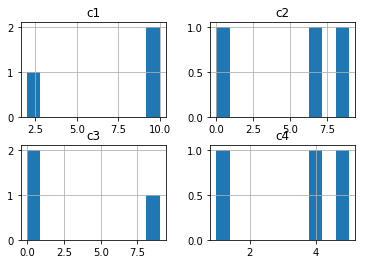

In [39]:
# 간단한 EDA
import matplotlib as plt
df.hist() #변수별 분포 확인

In [41]:
df.mean()

c1    7.333333
c2    5.333333
c3    3.000000
c4    3.333333
dtype: float64

In [85]:
grades_array1 = random.randint(100, size=(2,4))

index = ["sb", "dy"]
column = ["math", "econ", "phisics", "english"]

# array() takes from 1 to 2 positional arguments 
# but 3 were given => 성분으로 최대 2개까지만 가능

grade_df = pd.DataFrame(grades_array, index=index, columns=column)
grade_df

grades_array2 = random.randint(100, size=(1,4))

In [87]:
grade_final = np.concatenate((grades_array1, grades_array2), axis=0) #r-bind

In [116]:
index = ["sb", "dy", "ch"]
column = ["math", "econ", "phisics", "english"]
final_df = pd.DataFrame(grade_final, index=index, columns=column)
final_df

,math,econ,phisics,english
sb,82,36,41,20
dy,32,10,31,15
ch,22,70,9,63


In [180]:
final_df

,math,econ,phisics,english
sb,82,36,41,20
dy,32,10,31,15
ch,22,70,9,63


In [160]:
# 잘못쓴 컬럼 지우기
final_df = final_df.drop("mean", axis=1)

### 기술통계량 구하기
기술통계량 같은 경우, default는 컬럼(변수)별 통계량(axis=0)이 나옴 => 뒤에 concat도 그렇고 기본적으로 특정 변수에 대해서 행 방향 계산이 Default

In [178]:
# 변수별 평균
mean = round(final_df.mean(axis=0),2)
mean

math       45.33
econ       38.67
phisics    27.00
english    32.67
dtype: float64

In [172]:
# 객체별 평균 
final_df.mean(axis=1)

sb    44.75
dy    22.00
ch    41.00
dtype: float64

In [181]:
final_df.std(axis=0) #변수별 표준편차

math       32.145503
econ       30.088758
phisics    16.370706
english    26.388129
dtype: float64

In [188]:
std_class = final_df.std(axis=0) # 객체별 표준편차
std_class

math       32.145503
econ       30.088758
phisics    16.370706
english    26.388129
dtype: float64

In [197]:
var_class = final_df.var(axis=0)
var_person = final_df.var(axis=1) 

print(var_class, '\n')
print(var_person)

math       1033.333333
econ        905.333333
phisics     268.000000
english     696.333333
dtype: float64 

sb    696.916667
dy    124.666667
ch    903.333333
dtype: float64


In [201]:
# 과목별 표준편차, 분산 Test
def std_var_compare(x,y):
    x = std_class,
    y = var_class
    if y == x**2:
        print("x is std of class")
        
# x, y 데이터 타입 안맞는다고 ㅈㄹ

In [228]:
std = pd.DataFrame(std_class)

In [227]:
var = pd.DataFrame(var_class)

In [236]:
std_var = pd.concat([std,var], axis=1) # concat()의 default는 r-bind임

pd.DataFrame(std_var)

,0,0
math,32.145503,1033.333333
econ,30.088758,905.333333
phisics,16.370706,268.000000
english,26.388129,696.333333


In [237]:
std_var.columns = ["std_class", "var_class"]

In [242]:
std_var

,std_class,var_class
math,32.145503,1033.333333
econ,30.088758,905.333333
phisics,16.370706,268.000000
english,26.388129,696.333333
